## Import

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

%matplotlib inline

## Przygotowanie danych do uczenia

In [2]:
train_dir = 'anna_dominika_unknown_dataset/anna_dominika_unknown_dataset/train'
validation_dir = 'anna_dominika_unknown_dataset/anna_dominika_unknown_dataset/val'
test_dir = 'anna_dominika_unknown_dataset/anna_dominika_unknown_dataset/test'

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
 
train_dataset = train.flow_from_directory(
        train_dir,  
        target_size=(200, 200),  
        batch_size=20,
        shuffle=True,
        class_mode='categorical')

validation_dataset = validation.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        shuffle=True,
        class_mode='categorical')


Found 3150 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [3]:
train_dataset.class_indices

{'Anna': 0, 'Dominika': 1, 'Unknown': 2}

In [4]:
# print(len(train_dataset.classes))

(20, 200, 200, 3)


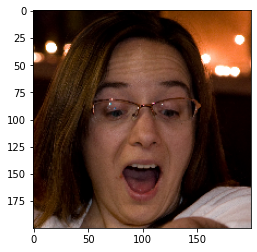

In [5]:
img, label = train_dataset.next()
print(img.shape)
plt.imshow(img[0])
plt.show()

## Model sieci

In [6]:
model = Sequential()

# Convolution & pooling - First convolution layer
model.add(Conv2D(16, (3, 3),
                      input_shape = (200,200,3),
                      activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer 
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# Convolution & pooling - Third convolution layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening 
model.add(Flatten())

# Full connection
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(3, activation='softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

## Uczenie

In [8]:
hist = model.fit(train_dataset, epochs = 15, validation_data = validation_dataset)

Epoch 1/15
158/158 [==============================] - 96s 605ms/step - loss: 0.8966 - accuracy: 0.6184 - val_loss: 0.4594 - val_accuracy: 0.8622
Epoch 2/15
158/158 [==============================] - 96s 606ms/step - loss: 0.4751 - accuracy: 0.8089 - val_loss: 0.1615 - val_accuracy: 0.9533
Epoch 3/15
158/158 [==============================] - 95s 600ms/step - loss: 0.3188 - accuracy: 0.8844 - val_loss: 0.1735 - val_accuracy: 0.9467
Epoch 4/15
158/158 [==============================] - 95s 599ms/step - loss: 0.1932 - accuracy: 0.9235 - val_loss: 0.0734 - val_accuracy: 0.9733
Epoch 5/15
158/158 [==============================] - 95s 601ms/step - loss: 0.1171 - accuracy: 0.9600 - val_loss: 0.0940 - val_accuracy: 0.9578
Epoch 6/15
158/158 [==============================] - 95s 602ms/step - loss: 0.0758 - accuracy: 0.9768 - val_loss: 0.1146 - val_accuracy: 0.9600
Epoch 7/15
158/158 [==============================] - 95s 602ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.1566 - val_ac

## Parametry

In [9]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


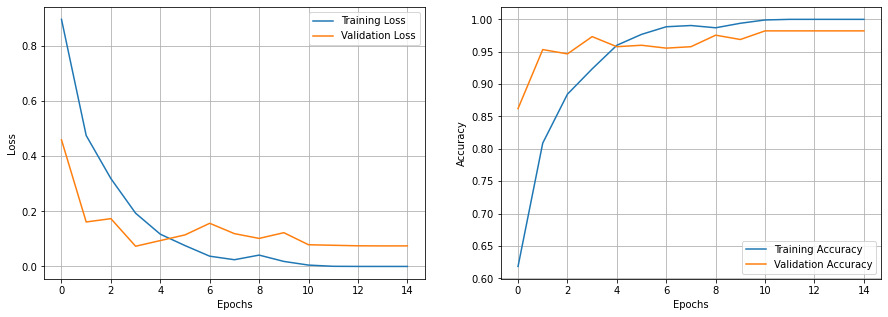

In [10]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## Predicting

In [11]:
test = ImageDataGenerator(rescale = 1./255)
test_dataset = test.flow_from_directory(test_dir,
                                        target_size = (200,200),
                                        batch_size = 1,
                                        class_mode = None,
                                       shuffle = False) 

predictions = model.predict_generator(test_dataset)

predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 900 images belonging to 3 classes.


C:\Users\domin\AppData\Local\Temp/ipykernel_5880/2450191636.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_dataset)


## Confusion matrix

In [12]:
test_labels = np.argmax(predictions, axis=1)
cm = pd.DataFrame(data=confusion_matrix(test_dataset.classes, test_labels, labels=[1, 0, 2]),
                  index=["Actual Dominika", "Actual Anna", "Actual Unknown"],
                  columns=["Predicted Dominika", "Predicted Anna", "Predicted Unknown"])
cm

,Predicted Dominika,Predicted Anna,Predicted Unknown
Actual Dominika,290,5,5
Actual Anna,6,291,3
Actual Unknown,3,1,296


## Saving the model

In [13]:
model.save('anna_dominika_unknown.h5')